# Week 2: Linear Regression - Implementation

This implementation is split into 4 parts:

1. Linear regression with a single variable, using Gradient Descent;


2. Linear regression with a single variable, using the Normal Equation;


3. Linear regression with multiple variables, using Gradient Descent; and


4. Linear regression with a single variable, using sci-kit learn.

# Part 1 - Linear regression with a single variable
______________________________________________________________________________________________________

In this exercise we'll implement simple linear regression using each of the above ingredients.  We'll also extend our implementation to handle multiple variables and apply it to a slightly more difficult example.

## Setting the Scene

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In the first part of the exercise, we will implement linear regression with one variable to predict profits for a food truck. 



## Step 1 - Importing Libraries

Let's start by importing some libraries and examining the data.

In [1]:
import numpy as np

# Imports numpy library and aliases as np

import pandas as pd

# Imports pandas library and aliases as pd

import matplotlib.pyplot as plt

# Imports matplotlib library and aliases as plt

%matplotlib inline

# %matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document

## Step 2 - Importing Data

In [2]:
import os

# The OS module in python provides a way of using operating system dependent functionality.  The functions that the OS module provides allow you to interface with the underlying OS that python is running on (in my case, Windows).

path = os.getcwd() + '\data\ex1data1.txt'

# os.getcwd returns the filepath to the current working directory ("cwd") and the + '\data\ex1data1.txt' appends the additional path to the ex1data1.txt file containing the data.  We asign this to the path variable.

data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

# pd.read_csv imports the file at "path" (i.e. what we defined above) as a comma separate value file ("csv").  "header" allows you to create / edit / rename headers for each column in your dataset. Here we've set header=None because the data set comes with no headers, and to rectify this, created new header names "Population" and "Profit".

data.head()

# Returns by defualt the first 5 rows of data (excluding headings, which are not included in that 5 row count).

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


See also: https://www.datacamp.com/community/tutorials/pandas-read-csv.  This explanation + tutorial is helpful at demonstrating the above process in more detail.

## Step 3 - Do some initial analysis!

In [3]:
data.describe()

# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN value.

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Step 4 - Plot the data

Let's plot it to get a better idea of what the data looks like.

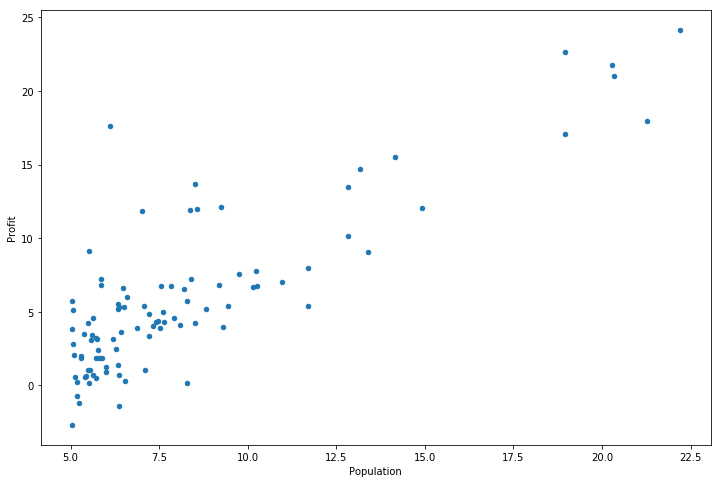

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

# Plot data as scatter graph and assigns values from the dataset to corresponding x and y axis values.  Figsize controls the size of the graph.

See also: https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python.  Great explanation and demo of key Matplotlib functions.

## Step 5 - Define the Training Dataset & Target Variables

### (a) Enable Vectorization

First we need to add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.



In [5]:
data.insert(0, 'Ones', 1)

Which means our dataset now looks like this:

In [6]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In other words whereas before we only had <b>one</b> feature, i.e. $x_1$ ("Population"), we now have <b>two</b> features: $x_0$ ("Ones") and $x_1$ ("Population").

### (b) Define the Training Data & Target Variable

Now let's do some variable initialization.

In [7]:
cols = data.shape[1]

# The shape attribute for numpy arrays always returns the dimensions of the array in the format m rows x n columns.  For instance, data.shape returns (97, 3) meaning the data has 97 rows and 3 columns.  Using data.shape[0] returns the number of rows (97) and data.shape[1] returns the number of columns.

X = data.iloc[:,0:cols-1]

# The .iloc function allows you to select rows / columns at particular positions in the index. It's syntax is data.iloc[<row selection>, <column selection>].  The above selects the first two columns of the dataset, i.e. "Ones" and "Population".  The ":" indicates select all rows, and "0:cols-1" means select all columns from index 0 to n-1, i.e. columns at index 0 and 1.  

# The resulting subselection is assigned to X.

y = data.iloc[:,cols-1:cols]

# The above selects the last column of the dataset, i.e. "Profit".  The ":" indicates select all rows, and "cols-1:cols" means select all columns from index n-1 to n, i.e. the last column at index 2.

See also this re subselection of data from datasets using iloc: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

Let's take a look to make sure X (training set) and y (target variable) look correct.

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Re the above, this tells us the X data is 97 rows x 3 columns.

In [10]:
data.shape

(97, 3)

### (c) Conveting X and y to numpy matrices

The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  

In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)

### (d) Initialise theta

We also need to initialize theta. 

In [12]:
theta = np.matrix(np.array([0,0]))

Here's what theta looks like.

In [13]:
theta

matrix([[0, 0]])

### (e) Checking the matrices shapes

Let's take a quick look at the shape of our matrices.

In [14]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

This tells us the dimensions of:

1. The $X$ matrix, which is $97$ rows x $2$ columns;


2. The $\theta$ matrix, which is $1$ row x $2$ columns; and


3. The $y$ matrix, which is $97$ rows x $1$ column.

## Step 6 - Define the Cost Function

Now let's implement linear regression using gradient descent to minimize the cost function.  The equations implemented in the following Steps 5 and 6 are detailed in "ex1.pdf".

To recap, the linear regression cost function is this:

\begin{align}
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2
\end{align}

To recreate the above in python we do this:

In [15]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

### (a) Intuition: mapping formula to the code

#### (i) X feature matrix

`X` is the matrix of all feature values, like so:

In [16]:
print("This is X:" ,X[:5],)

This is X: [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


It has <b>x 97 rows</b> and <b>x n + 1</b> columns, i.e. because there are n features plus $x_0$ values, which is the column of ones.  Note, although only first 5 shown above for brevity).

#### (ii) Theta matrix
`theta` is a <b>1 x (n + 1)</b> matrix of all theta values, like so:

In [17]:
print("This is theta:" ,theta,)

This is theta: [[0 0]]


It has <b>x 1 row</b> and <b>x n + 1</b> columns, i.e. because there are n features plus $x_0$ values, which is the column of ones described above.

#### (iii) Dimensions mismatch 

Because $X$ is <b>97 x (n + 1)</b> and theta is <b>1 x (n + 1)</b> their inner product does not match, i.e. number of columns of matrix 1 (i.e. $X$) must match number of rows of matrix 2 (i.e. $\theta$).  

As such $X$ and $\theta$ are incompatible for matrix x matrix multiplication.

To fix this, we <b>transpose</b> the X matrix.

#### (iv) Theta Transpose matrix

`theta.T` is the transposed matrix of `theta` like so:

In [18]:
print("This is theta.T:", theta.T,)

This is theta.T: [[0]
 [0]]


It is now <b>(n + 1) x 1</b> dimensions.  This means the inner products of $X$ and $\theta^{T}$ match:

$X$ = $97$ x $(n + 1)$ : $(n + 1)$ x $1$ = $\theta^{T}$

#### (v) Breaking down the code 

The cost function code:

```
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))
```

    
Breaks down as follows in terms of equivalence to the formula:

1. `inner = np.power(((X * theta.T) - y), 2)` is equivalent to $(h_\theta(x^{(i)}) - y^{(i)})^2$.

<p>

2. `np.sum(inner) / (2 * len(X))` is equivalent to $\frac{1}{2m}\sum_{i=1}^{m}$

### (b) Finally, let's compute the cost using our initial parameters!

Now let's compute the cost for our initial solution (0 values for $\theta_0$ and $\theta_1$).

In [19]:
computeCost(X, y, theta)

32.072733877455676

## Step 7 - Define Gradient Descent Function

So far so good.  Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the text.

Recall that the gradient descent algorithm is follows:

\begin{align}
\theta_j := \theta - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)
\end{align}

Which equates to the following (i.e. the below expands to show the derivative of the cost function):

\begin{align} 
\text{repeat until convergence \{} \\
\theta_j & := \theta_j - \alpha \dfrac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \\ 
\text{\}}
\end{align}

In [20]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])          
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost
    
    # Once run through all iterations, returns matrix of final theta values + matrix of costs.

## (a) Breaking down the code

See also: https://stackoverflow.com/questions/45605772/gradient-descent-for-linear-regression-in-python-code

#### (i) Line 2

`temp = np.matrix(np.zeros(theta.shape))`

`np.zeros` returns a <b>new</b> array of the given shape and type, filled with zeros.  In this case, we supply `(theta.shape)`, which is the shape of the theta matrix (i.e. 1 row x 2 columns).  

Altogether this generates the following:

`[[0. 0.]]`

Which is assigned to the variable, `temp`.

<b>Purpose:</b> initialises the a new matrix to store the updated values of $\theta_0$ and $\theta_1$ before assigning those values to `theta`, and thereby updating the values of $\theta$ ready to calculate `cost[i]` and to ready for the next iteration.

#### (ii) Line 3

`parameters = int(theta.ravel().shape[1])`

`.ravel()` "<b>flattens</b>" the theta matrix to a single row matrix, i.e. `[[0, 0]]`

`.shape[1]` returns the <b>number of columns</b> of that matrix, i.e. 2.

`.int`returns the integer value of that in brackets, i.e. 2.

All of which is assigned to the variable, `parameters`.

<b>Purpose:</b> is the number of weights, in our case only two, i.e. $\theta_0$ and $\theta_1$.

#### (iii) Line 4

`cost = np.zeros(iters)` creates a matrix of zeros where the number of zeros is equal to the number of iterations, in this case 1,000.  

<b>Purpose:</b> stores the cost values at the end of each iteration.

#### (iv) Line 5

`for i in range(iters):` means for each <b>iteraton</b> within desired "range", i.e. number of iterations, execute the code below it.  Note this syntax counts from $0$ up to but not including the value of `iters` ($1000$), meaning it iterates from and including $0$ to and including $999$ but excluding $1000$.

#### (vi) Line 6

`error = (X * theta.T) - y` creates a new variable equivalent to $h_\theta(x^{(i)}) - y^{(i)})$.  This is calculating the cost, i.e. difference between actual $y$ value (`-y`) and predicted $y$ value (`X * theta.T`), for each training example.  This results in a new $97$ x $1$ matrix (`error`) listing the error for each training example at the end of each iteration.

#### (vii) Line 7

`for j in range(parameters):` means for each <b>feature</b>, i.e. execute the below two lines of code for $x_0$ and then, once done, execute the below two lines of code for $x_1$.  

Note this syntax counts from $0$ up to but not including the value of `parameters` ($2$), meaning it iterates from and including $0$ to and including $1$ but excluding $2$.


#### (viii) Line 8

`term = np.multiply(error, X[:,j])` is equivalent to $h_\theta(x^{(i)}) - y^{(i)}).x^{(i)}$.  

To recap, this multiples each row of the errors vector (`error`) against each of the corresponding $x^{i}$ feature rows (`X[:,j]`) in X. 

So in each sub-iteration (i.e. within the second for loop `for j in range(parameters)`):

1. This is `error` x `X[:,0]`, which is each row of the error vector multiplied by each row of the $x_0$ vector (i.e. the "ones"); and


2. This is `error` x `X[:,1]`, which is each row of the error vector multiplied by each row of the $x_1$ vector (i.e. the "Population" figures).

#### (ix) Line 9

`temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))` does the following:

1. Updates $\theta_0$ and stores the result in a temporary variable, i.e. index 0 in the `temp` array (`temp[0]`); and 


2. Updates $\theta_1$ and stores the result in a temporary variable, i.e. index 1 in the `temp` array (`temp[1]`).

##### (x) Lines 8 and 9

Lines 8 and 9 are equivalent to the below:

\begin{align} 
\text{repeat until convergence \{} \\
\theta_j & := \theta_j - \alpha \dfrac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \\ 
\text{\}}
\end{align}

Note: lines 8 and 9 are executed first for $x_0$ and, once executed, lines 8 and 9 are separately executed for $x_1$.

##### (xi) Line 10

`theta = temp` simultaneously updates $\theta$ matrix with the values of `temp` <i>after</i> each of $\theta_0$ and $\theta_1$ have been separately updated.

##### (xii) Line 11

`cost[i] = computeCost(X, y, theta)` computes the cost at the end of each iteration using the values of $X$, $y$ and latest values of $\theta$.

## (b) Initial Alpha and No. of Iterations

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

In [21]:
alpha = 0.01
iters = 1000

## (c) Run Gradient Descent!

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [71]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

Note, per the above the final statement of the `gradientDescent` function returns both: 

1. the value of $\theta$; and 


2. the cost,

in each case, after the requisite number of iterations have run (i.e. 1000).  These are:

* `g ==> [[-3.24140214,  1.1272942 ]]` and 


* `cost ==> array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494, ...])`.

Multiple assignment is used above such that the resulting $thet$ values are assigned to `g` and the resulting cost assigned to `cost`.

## Step 8 - Compute the Cost Function

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [23]:
computeCost(X, y, g)

4.515955503078912

## Step 9 - Plot the Results

### (a) Plot the Linear Model

Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5,1,'Predicted Profit vs. Population Size')

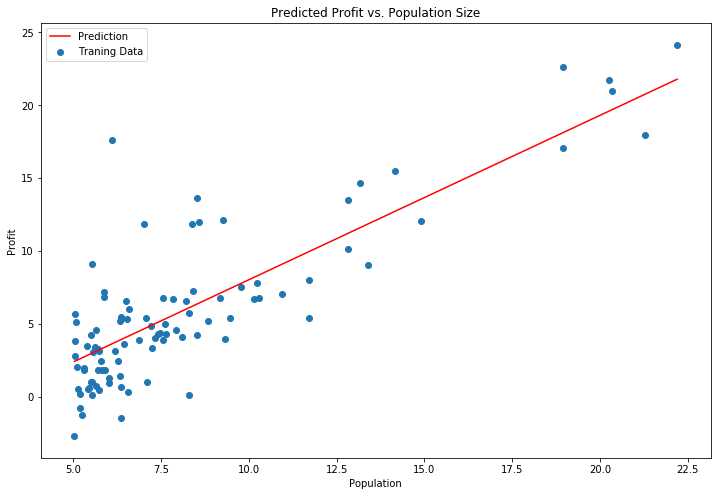

In [24]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

### (b) Plot Gradient Descent Progression

Looks pretty good!  Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5,1,'Error vs. Training Epoch')

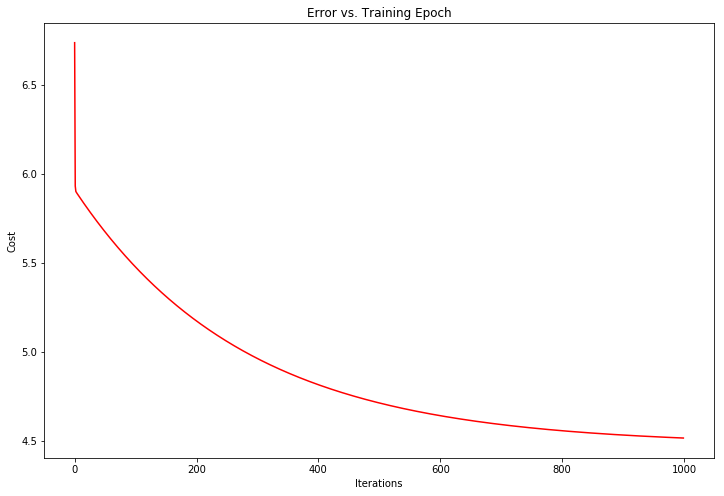

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Part 2 - Linear Regression with the Normal Equation

------------------

## Step 1 - Defining the Normal Equation

To recap the normal equation is as follows:

\begin{align}
\theta = (X^{T}X)^{-1}X^{T}y
\end{align}

In [94]:
def normalEquation(X, y):
    new_theta = (np.linalg.inv(X.T * X) * X.T * y).T
    return new_theta

## Step 2 - Running the Normal Equation

This returns the optimal $\theta$ values, which are: 

In [95]:
normalEquation(X, y)

matrix([[-3.89578088,  1.19303364]])

## Step 3 - Computing the Cost

If we plug our new $\theta$ values into the cost function we get:

In [86]:
computeCost(X, y, new_theta)

4.476971375975179

## Step 4 - Plotting the Results

Let's plot the line of best fit from using the Normal Equation alongside the line of best fit from using gradient descent:

Text(0.5,1,'Predicted Profit vs. Population Size')

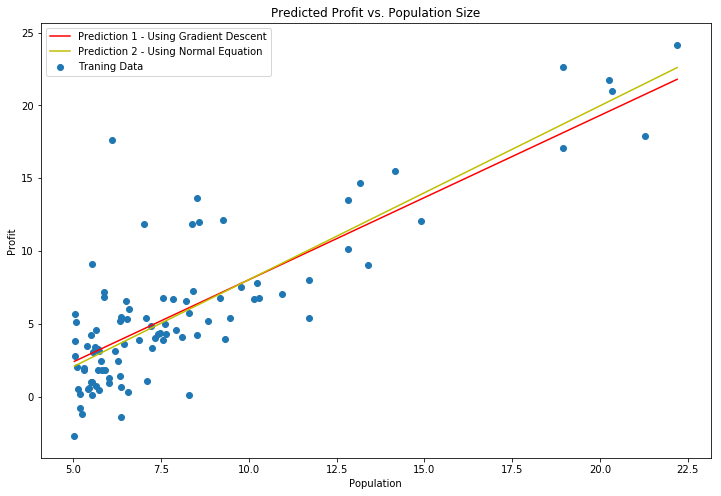

In [96]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f1 = g[0, 0] + (g[0, 1] * x)
f2 = new_theta[0, 0] + (new_theta[0, 1] * x)


fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f1, 'r', label='Prediction 1 - Using Gradient Descent')
ax.plot(x, f2, 'y', label='Prediction 2 - Using Normal Equation')

ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

# Part 3 - Linear regression with multiple variables
______________________________________________________________________________________________________

## Setting the Scene

Exercise 1 also included a housing price data set with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house). 

Let's use the techniques we already applied to analyze that data set as well, i.e. to find an algorithm that predicts house prices $y$ given multiple input variables $x$.

## Step 1 - Importing Data

In [72]:
path = os.getcwd() + '\data\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Step 2 - Normalising the Data

For this task we add another pre-processing step - normalizing the features.  To recap, this is implemented using this formula:

\begin{align}
x_i := \frac{x_i - \mu_i}{s_i}
\end{align}

This is very easy with pandas:

In [27]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

## Step 3 - Define the Training Dataset & Target Variables

In [ ]:
# add ones column to enable vectorization
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

## Step 4 - Perform Linear Regression

In [28]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

We can take a quick look at the training progess for this one as well.

Text(0.5,1,'Error vs. Training Epoch')

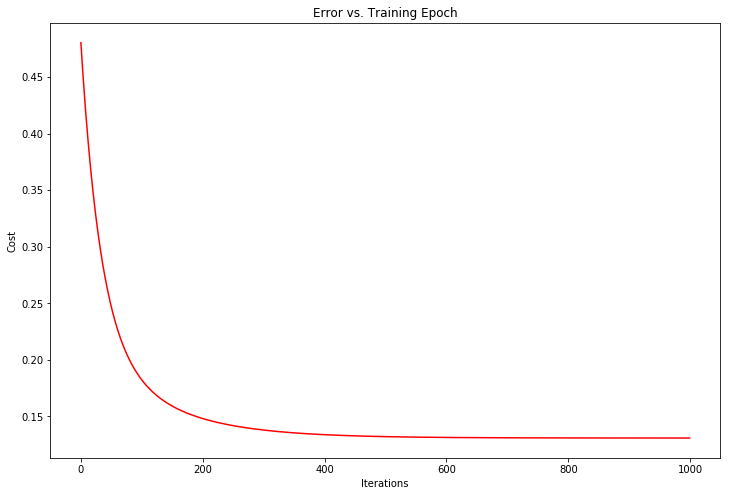

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Part 4 - Linear Regression with a single variable (Libraries!)
____________________________

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function.  

## Step 1 - Fit data to scikit-learn's Linear Regression function

In [144]:
# Import the linear model
from sklearn import linear_model

# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the data set
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step 2 - Plot the Results!

Here's what the scikit-learn model's predictions look like.

Text(0.5,1,'Predicted Profit vs. Population Size')

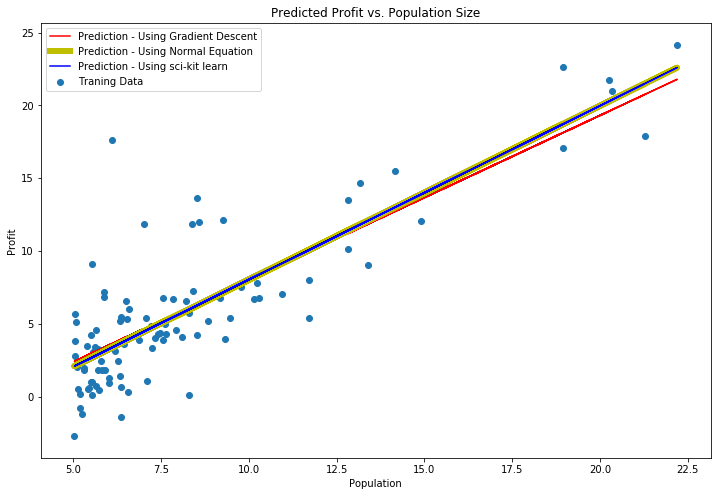

In [145]:
x = np.array(X[:, 1].A1)
f3 = model.predict(X).flatten()
f1 = g[0, 0] + (g[0, 1] * x)
f2 = new_theta[0, 0] + (new_theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f1, 'r', label='Prediction - Using Gradient Descent')
ax.plot(x, f2, 'y', lw=6, label='Prediction - Using Normal Equation')
ax.plot(x, f3, 'b', label='Prediction - Using sci-kit learn')

ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

As you can see, the line of best fit determined using the normal equation and sci-kit learn are identical, hence overlapping.